In [1]:
from sciml.model.fno import FNO
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

2025-03-09 01:05:13.036047: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-09 01:05:13.046067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741478713.057985  135497 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741478713.061293  135497 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 01:05:13.074584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
p_1 = 400
p_2 = 400
p_3 = 400
epochs = 30  
index = 10

In [3]:
first_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_1,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_2, activation='relu'),
])

last_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_2,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_3, activation='relu'),
])

I0000 00:00:1741478715.244261  135497 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
folder_path = "data/test_data/example_data_fno/heat2d/"

In [5]:
n_layers = 3
n_modes = p_2 # we use the same number of modes for the network, perfect fourier transform with well known heisenberg inequality (supp )*(supp F) >= n_modes

activation = 'relu'
kernel_initializer = 'he_normal'
device = "GPU"
n_epochs = epochs


In [6]:
model = FNO(regular_params={"first_network": first_network, "last_network": last_network},fourier_params={"n_layers": n_layers, "n_modes": n_modes, "activation": activation, "kernel_initializer": kernel_initializer}, hyper_params={"p_1": p_1, "p_2": p_2,'p_3':p_3,"device": device,"n_epochs":n_epochs,"index":index})

INFO:sciml.model.fno.fno:Model initialized with 30 epochs, 32 batch size, 0.001 learning rate


In [7]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 9837.12it/s]
ERROR:sciml.model.fno.fno:Data not found in /home/janis/SCIML/sciml/data/test_data/example_data_fno/heat2d/
2025-03-09 01:05:13.735606: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Shapes of all inputs must match: values[0].shape = [2] != values[1].shape = []


ValueError: Data not found in /home/janis/SCIML/sciml/data/test_data/example_data_fno/heat2d/

In [8]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 400)
(40, 8000, 3)
(40,)


In [9]:
train_history = model.fit()

Training progress:   0%|          | 0/30 [00:00<?, ?it/s]2025-03-09 01:02:53.824450: W tensorflow/core/framework/op_kernel.cc:1829] INVALID_ARGUMENT: required broadcastable shapes
2025-03-09 01:02:53.824490: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: required broadcastable shapes
Training progress:   0%|          | 0/30 [00:00<?, ?it/s]


InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:Sub] name: 

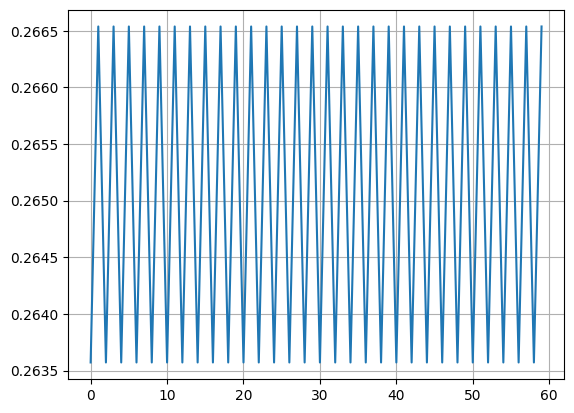

In [ ]:
plt.plot(train_history)
plt.grid()
plt.show()